### 1. Exploring data info using LFP object

Here we will explore info about a given section of the data using the LFP object, i.e., we will print some information contained in the recording and trial info files.


In [69]:
from GDa.LFP import LFP

In [100]:
lfp_data = LFP(raw_path = 'GrayLab/', monkey = 'lucy', stype = 'samplecor', date = '150304', 
               session = 1, evt_dt = [-0.65,3.00])

To read the information about the section and date we are using we have to call the method 'read_session_info()':

In [101]:
lfp_data.read_session_info()

This will create the atributes 'trial_info', and 'recording_info' in the object. We can check the keys of those atributes as below:

In [102]:
print('Trial info keys')
print('------------------------------------------------------------------------------------------------------------------')
print(lfp_data.trial_info.keys())
print('------------------------------------------------------------------------------------------------------------------')
print('Recording info keys')
print('------------------------------------------------------------------------------------------------------------------')
print(lfp_data.recording_info.keys())

Trial info keys
------------------------------------------------------------------------------------------------------------------
dict_keys(['behavioral_response', 'match_image', 'match_location', 'match_on', 'nonmatch_image', 'nonmatch_location', 'num_trials', 'reaction_time', 'sample_image', 'sample_location', 'sample_off', 'sample_on', 'trial_type'])
------------------------------------------------------------------------------------------------------------------
Recording info keys
------------------------------------------------------------------------------------------------------------------
dict_keys(['image_locations', 'image_names', 'image_data', 'channel_count', 'channel_numbers', 'area', 'depth', 'fsample', 'calib_eye_sampling_rate', 'number_sua', 'ms_mod', 'slvr'])


In [103]:
import matplotlib.pyplot as plt
import numpy             as np

Let's start by exploring some information concerning the trials in 'trial_info' starting by the 'sample_on', and 'sample_off' times.


Text(0.5, 0, 'Sample on')

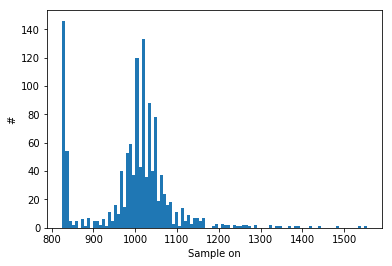

In [104]:
plt.hist(lfp_data.trial_info['sample_on'], 100)
plt.ylabel('#')
plt.xlabel('Sample on')

Text(0.5, 0, 'Sample on')

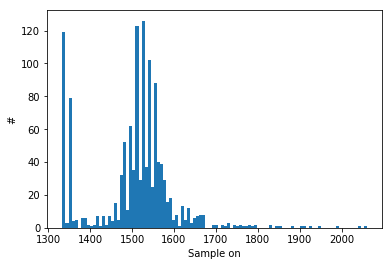

In [105]:
plt.hist(lfp_data.trial_info['sample_off'], 100)
plt.ylabel('#')
plt.xlabel('Sample on')

As one can see the interval of presentation of the cue varies from trial to trial within a session's date, this can be seen further by plotting the histogram of the time differences:

Text(0.5, 0, 'Sample off - Sample on')

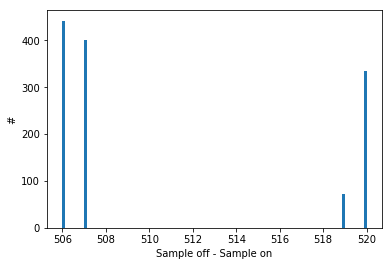

In [106]:
plt.hist(lfp_data.trial_info['sample_off']-lfp_data.trial_info['sample_on'] , 100)
plt.ylabel('#')
plt.xlabel('Sample off - Sample on')

If you plot the 'match_on', and 'match_off' you will notice that the same is truth.

Next, let's look at the recording informations. First let's plot the distribution of channels across areas in the cortex:

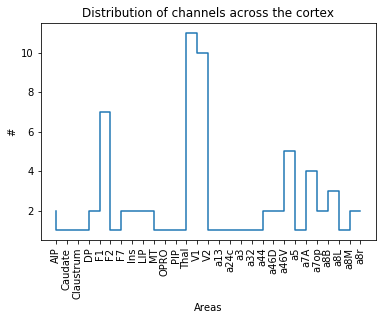

In [107]:
c, x = np.histogram(lfp_data.recording_info['area'], bins = np.unique(lfp_data.recording_info['area']))
plt.step(range(len(c)), c)
plt.xticks(range(len(c)), x, rotation = 90)
plt.ylabel('#')
plt.xlabel('Areas')
plt.title('Distribution of channels across the cortex')
plt.show()

Next, the depth of channels:

Text(0.5, 0, 'Depth (mm)')

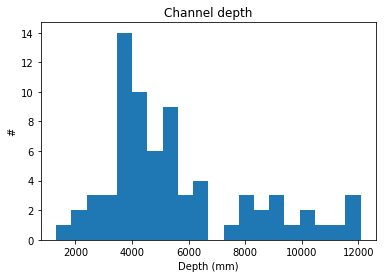

In [108]:
plt.hist(lfp_data.recording_info['depth'], 20)
plt.title('Channel depth')
plt.ylabel('#')
plt.xlabel('Depth (mm)')

And finally, the  image data

([], <a list of 0 Text yticklabel objects>)

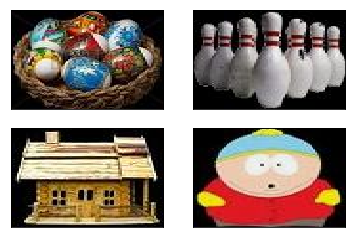

In [111]:
plt.subplot(2,2,1)
plt.imshow(lfp_data.recording_info['image_data'][0], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(lfp_data.recording_info['image_data'][1], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(lfp_data.recording_info['image_data'][2], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(lfp_data.recording_info['image_data'][3], aspect='auto', cmap='jet')
plt.xticks([])
plt.yticks([])

The other informations can be easily explored the same way.